In [209]:
import typing
import json
import glob

import numpy
import pandas 

import scipy
import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import seaborn

In [ ]:
MODELS: typing.List[str] = [
    "llama3.1-8b",
]

In [211]:
raw: typing.Dict[str, pandas.DataFrame]= {
    **{
        model: (
                pandas.concat(
                [
                    pandas.json_normalize(json.load(open(file))).assign(participant=n)
                    for n, file in enumerate(glob.glob(f"data/base/{model}/*.json", recursive=True))
                ],
            )
            .pivot(index="participant", columns="id", values="response")
            .apply(pandas.to_numeric)
        )
        for model in MODELS
    },
    "human_full": (
        pandas.read_csv("../../../data/humor_styles/survey.csv")
        .rename_axis(index="participant")
        .filter(like='Q', axis=1)
        .pipe(lambda _df: (
            _df
            .rename(columns={col: col[1:] for col in _df.columns})
        ))
        .replace(-1, None)
        .apply(pandas.to_numeric)
    ),
    "random": (
        pandas.DataFrame(numpy.random.randint(0,5, (1000, 32)), columns=range(1,33))
        .rename_axis(index="participant")
    )
}

raw.keys()

dict_keys(['llama3.1-8b', 'llama3.3-70b', 'mistral-7b', 'mistral-large-123b', 'qwen2.5-7b', 'qwen2.5-72b', 'human_full', 'random'])

In [216]:
for key, values in raw.items():
    values.to_csv(f"reports/raw.{key}.csv", index=False)

In [215]:
descriptive = pandas.concat({
    key: statsmodels.stats.descriptivestats.describe(values).T
    for key, values in raw.items()
})
descriptive

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubun

nobs  missing      mean   std_err  upper_ci  lower_ci  \
llama3.1-8b   1   1000.0     14.0  2.280933  0.036799  2.353058  2.208808   
              2   1000.0     11.0  2.984833  0.040777  3.064755  2.904911   
              3   1000.0     10.0  2.612121  0.047262  2.704753  2.519489   
              4   1000.0      5.0  2.858291  0.041374  2.939383  2.777200   
              5   1000.0     11.0  4.029323  0.025395  4.079095  3.979550   
...                  ...      ...       ...       ...       ...       ...   
human_sampled 28  1000.0      0.0  2.657000  0.041510  2.738358  2.575642   
              29  1000.0      0.0  1.894000  0.036826  1.966177  1.821823   
              30  1000.0      0.0  3.492000  0.032787  3.556262  3.427738   
              31  1000.0      0.0  2.350000  0.040089  2.428572  2.271428   
              32  1000.0      0.0  2.375000  0.038286  2.450040  2.299960   

                       std  iqr  iqr_normal       mad  ...  median   1%   5%  \
llama3.1-8b   1   1.155513  2.0    1.482602  0.945256  ...     2.0  1.0  1.0   
              2   1.282383  2.0    1.482602  1.049594  ...     3.0  1.0  1.0   
              3   1.487071  3.0    2.223903  1.363832  ...     2.0  1.0  1.0   
              4   1.305082  2.0    1.482602  1.141808  ...     3.0  1.0  1.0   
              5   0.798626  2.0    1.482602  0.592810  ...     4.0  2.0  3.0   
...                    ...  ...         ...       ...  ...     ...  ...  ...   
human_sampled 28  1.312659  2.0    1.482602  1.064672  ...     3.0  0.0  0.0   
              29  1.164526  2.0    1.482602  0.908620  ...     2.0  0.0  0.0   
              30  1.036827  1.0    0.741301  0.861744  ...     3.0  1.0  2.0   
              31  1.267717  2.0    1.482602  1.036600  ...     2.0  0.0  0.0   
              32  1.210719  1.0    0.741301  1.003000  ...     2.0  0.0  0.0   

                  10%  25%  50%  75%  90%  95%  99%  
llama3.1-8b   1   1.0  1.0  2.0  3.0  4.0  4.0  5.0  
              2   1.0  2.0  3.0  4.0  5.0  5.0  5.0  
              3   1.0  1.0  2.0  4.0  5.0  5.0  5.0  
              4   1.0  2.0  3.0  4.0  4.0  5.0  5.0  
              5   3.0  3.0  4.0  5.0  5.0  5.0  5.0  
...               ...  ...  ...  ...  ...  ...  ...  
human_sampled 28  1.0  2.0  3.0  4.0  4.0  5.0  6.0  
              29  0.0  1.0  2.0  3.0  3.0  4.0  5.0  
              30  2.0  3.0  3.0  4.0  5.0  5.0  6.0  
              31  1.0  1.0  2.0  3.0  4.0  4.0  5.0  
              32  1.0  2.0  2.0  3.0  4.0  4.0  5.0  

[288 rows x 31 columns]

In [214]:
raw["human_sampled"] = (
    pandas.DataFrame(numpy.stack([
        numpy.random.normal(row["mean"], row["std"], 1000).astype(int)
        for _, row in descriptive.loc["human_full"][["mean", "std"]].iterrows()
    ], axis=1), columns=range(1,33))
    .rename_axis(index="participant")
)

In [62]:
pandas.concat({
    (key_1, key_2): (
        pandas.Series(
            scipy
            .stats.f_oneway(
                values_1,
                values_2,
                nan_policy="omit"
            )
            .pvalue
            > 0.05,
            name="f_oneway_significant"
        )
        .value_counts()
    )
    for key_1, values_1 in raw.items()
    for key_2, values_2 in raw.items()
}).to_frame()

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:618: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:634: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  return result_to_tuple(hypotest_fun_out(*samples, **kwds), n_out)


count
                                      f_oneway_significant       
llama3.1-8b        llama3.1-8b        True                     23
                                      False                     9
                   llama3.3-70b       False                    31
                                      True                      1
                   mistral-7b         False                    30
...                                                           ...
human_item_sampled qwen2.5-72b        True                      2
                   human              False                    32
                   random             False                    30
                                      True                      2
                   human_item_sampled True                     32

[142 rows x 1 columns]

In [164]:
def calc_fingerprint(df: pandas.DataFrame) -> numpy.ndarray:
    corr_matrix = numpy.triu(df.corr("pearson").fillna(0.0).to_numpy())

    return corr_matrix[numpy.triu_indices_from(corr_matrix, k=1)]

def calc_similarity(df_1, df_2) -> float:
    x1 = calc_fingerprint(df_1)
    x2 = calc_fingerprint(df_2)
    
    return numpy.dot(x1, x2)/(numpy.linalg.norm(x1)*numpy.linalg.norm(x2))

In [197]:
sim = (
    pandas.concat({
        (key_1, key_2): pandas.Series(
            calc_similarity(values_1, values_2),
            name="similarity"
        )
        for key_1, values_1 in raw.items()
        for key_2, values_2 in raw.items()
    })
    .to_frame()
    .reset_index(level=[0, 1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .reindex(
        columns=(idx := ["random", "human_sampled", "human_full", *MODELS]),
        index=idx
    )
    .where(lambda df: pandas.DataFrame(
        [[i > j for j in range(len(df.columns))] for i in range(len(df.index))],
        index=df.index,
        columns=df.columns
    ))
)

print(
    sim
    .style
    # .background_gradient(axis=None)
    .format(na_rep="", precision=3) 
    .format_index(escape="latex", axis=1)
    .format_index(escape="latex", axis=0)
    .map_index(
        lambda v: "rotatebox:{65}--rwrap--latex;", level=0, axis=1
    ) 
    .to_latex(convert_css=True, hrules=True, clines="skip-last;data") 
)

\begin{tabular}{lrrrrrrrrr}
\toprule
level_1 & \rotatebox{65}{random} & \rotatebox{65}{human\_sampled} & \rotatebox{65}{human\_full} & \rotatebox{65}{llama3.1-8b} & \rotatebox{65}{llama3.3-70b} & \rotatebox{65}{mistral-7b} & \rotatebox{65}{mistral-large-123b} & \rotatebox{65}{qwen2.5-7b} & \rotatebox{65}{qwen2.5-72b} \\
level_0 &  &  &  &  &  &  &  &  &  \\
\midrule
random &  &  &  &  &  &  &  &  &  \\
human\_sampled & 0.033 &  &  &  &  &  &  &  &  \\
human\_full & -0.045 & -0.002 &  &  &  &  &  &  &  \\
llama3.1-8b & 0.029 & -0.016 & 0.011 &  &  &  &  &  &  \\
llama3.3-70b & 0.002 & -0.004 & -0.008 & 0.093 &  &  &  &  &  \\
mistral-7b & -0.021 & 0.070 & -0.014 & -0.040 & 0.014 &  &  &  &  \\
mistral-large-123b & 0.039 & -0.001 & -0.050 & 0.038 & 0.053 & -0.044 &  &  &  \\
qwen2.5-7b & 0.055 & -0.032 & 0.004 & -0.054 & 0.018 & 0.045 & -0.014 &  &  \\
qwen2.5-72b & 0.042 & 0.080 & -0.068 & -0.034 & 0.035 & 0.051 & -0.069 & 0.050 &  \\
\bottomrule
\end{tabular}



<Axes: xlabel='level_1', ylabel='level_0'>

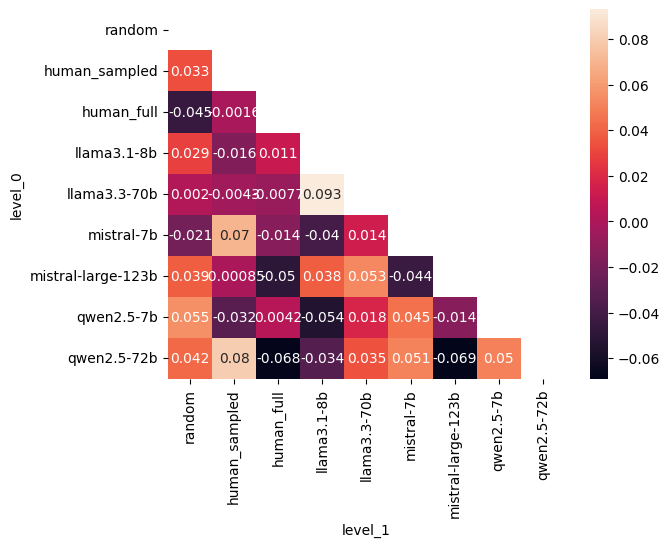

In [198]:
seaborn.heatmap(sim, annot=True, mask=numpy.triu(sim))

In [206]:
human_chunked = {
    f"{n:02d}": chunk
    for n, chunk in enumerate(numpy.array_split(raw["human_full"].sample(frac=1.0), 10), start=1)
}

sim = (
    pandas.concat({
        (key_1, key_2): pandas.Series(
            calc_similarity(values_1, values_2),
            name="similarity"
        )
        for key_1, values_1 in human_chunked.items()
        for key_2, values_2 in human_chunked.items()
    })
    .to_frame()
    .reset_index(level=[0,1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    #
    .where(lambda df: pandas.DataFrame(
        [[i > j for j in range(len(df.columns))] for i in range(len(df.index))],
        index=df.index,
        columns=df.columns
    ))
    .style
    .format(na_rep="", precision=3) 
    .format_index(escape="latex", axis=1)
    .format_index(escape="latex", axis=0)
    .to_latex(convert_css=True, hrules=True, clines="skip-last;data") 
)

print(sim)

\begin{tabular}{lrrrrrrrrrr}
\toprule
level_1 & 01 & 02 & 03 & 04 & 05 & 06 & 07 & 08 & 09 & 10 \\
level_0 &  &  &  &  &  &  &  &  &  &  \\
\midrule
01 &  &  &  &  &  &  &  &  &  &  \\
02 & 0.828 &  &  &  &  &  &  &  &  &  \\
03 & 0.832 & 0.886 &  &  &  &  &  &  &  &  \\
04 & 0.853 & 0.885 & 0.891 &  &  &  &  &  &  &  \\
05 & 0.791 & 0.836 & 0.831 & 0.844 &  &  &  &  &  &  \\
06 & 0.780 & 0.833 & 0.803 & 0.812 & 0.820 &  &  &  &  &  \\
07 & 0.776 & 0.822 & 0.805 & 0.798 & 0.787 & 0.775 &  &  &  &  \\
08 & 0.813 & 0.853 & 0.868 & 0.854 & 0.823 & 0.821 & 0.821 &  &  &  \\
09 & 0.857 & 0.851 & 0.840 & 0.855 & 0.788 & 0.787 & 0.812 & 0.808 &  &  \\
10 & 0.831 & 0.826 & 0.815 & 0.824 & 0.793 & 0.794 & 0.824 & 0.802 & 0.815 &  \\
\bottomrule
\end{tabular}



/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
